## Hate Speech Analysis and Detection

- The objective of this project is to analyze and mitigate hate speech in online platforms through a comprehensive approach that encompasses contextual analysis, temporal analysis, user profiling, geospatial analysis, false positive/negative analysis, and hate speech detection. 
- By addressing these aspects, the project aims to enhance our understanding of hate speech dynamics, identify patterns and trends over time, profile users prone to engaging in hate speech, analyze geographic distributions, evaluate model performance, and ultimately develop effective strategies to detect and mitigate hate speech online.

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading the dataset

In [2]:
df1=pd.read_csv('Annotations_Metadata.csv')
df1.head()

,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,noHate
1,12834217_2,572066,1346,0,noHate
2,12834217_3,572066,1346,0,noHate
3,12834217_4,572066,1346,0,hate
4,12834217_5,572066,1346,0,noHate


- The 'file_id' column consists the 'id' of the '.txt' file which contains the scraped hate speech in the folder named 'Text file'

In [3]:
df1.shape

(10944, 5)

In [4]:
pd.DataFrame({'dtypes':df1.dtypes,'null_count':df1.isnull().sum(),
              'unique_values':df1.nunique(),
             'percent_of_null_values':df1.isnull().mean()})

,dtypes,null_count,unique_values,percent_of_null_values
file_id,object,0,10944,0.0
user_id,int64,0,2792,0.0
subforum_id,int64,0,21,0.0
num_contexts,int64,0,20,0.0
label,object,0,4,0.0


- No null values in the dataset

In [5]:
df1['label'].unique()

array(['noHate', 'hate', 'idk/skip', 'relation'], dtype=object)

- In the target i.e.'label' ,there are 4 unique classes, but I'm interested only in 'noHate', 'hate' classes alone.
- I'll filter the remaining 'idk/skip', 'relation' classes which has around 200 rows of data.

### In the dataframe above there is a column named 'file_id' which has the ids of various '#.txt' files . I'll use these ids to open the .txt file and extract the text content from it and join to the original df using the 'file_id' .The process is done below:

In [6]:
import re
data = []

for txt_file in list(df1['file_id']):
    z=[]
    with open(f'./Text file/{txt_file}.txt',encoding='utf8') as inp:
        for line in inp:
            z.append(line)
            
        #removing urls from the string using regex
        z1=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ",''.join(z))
        data.append([txt_file,''.join(z1)])

# Let us view the extracted text data
data[:5]

[['12834217_1',
  'As of March 13th , 2014 , the booklet had been downloaded over 18,300 times and counting .'],
 ['12834217_2',
  'In order to help increase the booklets downloads , it would be great if all Stormfronters who had YouTube accounts , could display the following text in the description boxes of their uploaded YouTube videos .'],
 ['12834217_3',
  '( Simply copy and paste the following text into your YouTube videos description boxes. )'],
 ['12834217_4',
  'Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engineered INTENTIONAL destruction of Western civilization .'],
 ['12834217_5', "Click on the `` DOWNLOAD ( 7.42 MB ) '' green banner link ."]]

In [7]:
len(data)

10944

### Creating a new dataframe which contains the file id and its respective text

In [8]:
df2=pd.DataFrame(data=data,columns=['file_id','text'])
df2.head()

,file_id,text
0,12834217_1,"As of March 13th , 2014 , the booklet had been..."
1,12834217_2,In order to help increase the booklets downloa...
2,12834217_3,( Simply copy and paste the following text int...
3,12834217_4,Click below for a FREE download of a colorfull...
4,12834217_5,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...


### Merging df1 and df2 

In [9]:
df=pd.merge(df1, df2, on='file_id', how='outer')
df.head()

,file_id,user_id,subforum_id,num_contexts,label,text
0,12834217_1,572066,1346,0,noHate,"As of March 13th , 2014 , the booklet had been..."
1,12834217_2,572066,1346,0,noHate,In order to help increase the booklets downloa...
2,12834217_3,572066,1346,0,noHate,( Simply copy and paste the following text int...
3,12834217_4,572066,1346,0,hate,Click below for a FREE download of a colorfull...
4,12834217_5,572066,1346,0,noHate,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...


In [10]:
#filtering the dataset to have only 'hate' and 'nohate' classes

df=df.loc[(df['label'] !='relation') & (df['label'] !='idk/skip')]
df.shape

(10703, 6)

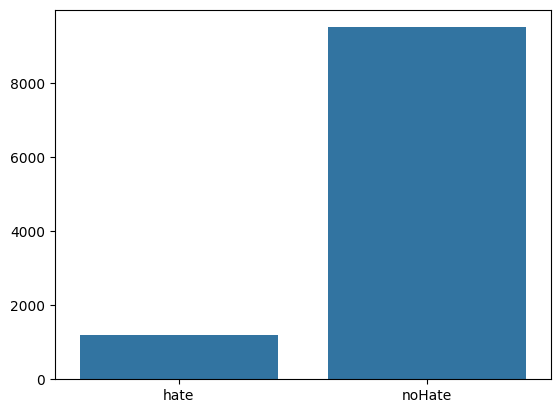

Total number of rows having "hate" as its "label":  1196
Total number of rows having "noHate" as its "label":  9507


In [11]:
import seaborn as sns

w=[len(df.loc[df['label']=='hate']),len(df.loc[df['label']=='noHate'])]
w1=['hate','noHate']
sns.barplot(x=w1,y=w)
plt.show()

print('Total number of rows having "hate" as its "label": ',len(df.loc[df['label']=='hate']))
print('Total number of rows having "noHate" as its "label": ',len(df.loc[df['label']=='noHate']))

In [12]:
df['label'].value_counts()

label
noHate    9507
hate      1196
Name: count, dtype: int64

### Replacing Contractions

In [13]:
list(df['text'])

['As of March 13th , 2014 , the booklet had been downloaded over 18,300 times and counting .',
 'In order to help increase the booklets downloads , it would be great if all Stormfronters who had YouTube accounts , could display the following text in the description boxes of their uploaded YouTube videos .',
 '( Simply copy and paste the following text into your YouTube videos description boxes. )',
 'Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engineered INTENTIONAL destruction of Western civilization .',
 "Click on the `` DOWNLOAD ( 7.42 MB ) '' green banner link .",
 'Booklet updated on Feb. 14th , 2014 .',
 '( Now with over 18,300 Downloads. )',
 "PDF file :   _ 2-14-14.docx Watch the 10 hour video version of `` The Zionist Attack on Western Civilization '' @   _ White _ YT _ Comment _ ( Hyperlinked ) .txt   ( Hyperlinked-Back-Up % 5D.txt   ? v = _ 8hg254ALpM Are you interested in helping spread the booklet download link across the worl

In [14]:
# Defining a contraction dictionary
contractions = {
    "'d":'would',
    "didnt":"did not",
    "dont":"do not",
    "'re":"are",
    "'s":"is",
     "'ve":"have",
    "n't":"could not",
    "'ll":"will",
    "ain't": "am not / are not",
    "are n't": "are not / am not",
    "aren't": "are not / am not",
     "can't": "cannot",
    "ca n't": "cannot",

    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
     "could n't":"could not",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
      "do n't":"do not",

    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is",
    "i'd": "I had / I would",
    "i'd've": "I would have",
     "I 'll": "I shall / I will",
    "i'll": "I shall / I will",
    "i'll've": "I shall have / I will have",
    "i 'm": "I am",
    "i'm": "I am",
    "i 've": "I have",
    "i've": "I have",
    "is n't":"is not",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
     "it 's": "it has / it is",
    "it's": "it has / it is",
    "let's": "let us",
     "let 's":"let us",

    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "that 's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they 'd": "they had / they would",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
     "y' all":"you all",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have",
    }

In [15]:
contractions["'s"]


'is'

In [16]:
txt_replace_contractions=[]

for i in list(df['text']):
    e=[]
    for j in i.split():
        try:
            e.append(contractions[j.lower()])
        except KeyError:
            e.append(j.lower()) 
    txt_replace_contractions.append(' '.join(e))
print(len(txt_replace_contractions))

10703


In [17]:
df['text'].iloc[5385]

"Let us know when you 've joined and we can give you another well-deserved cheer ."

In [18]:
txt_replace_contractions[5385]

'let us know when you have joined and we can give you another well-deserved cheer .'

In [19]:
df['text_con_rem']=txt_replace_contractions

### Creating a new columns 'corrected_text' and 'lemma_text'

In [20]:
%%time
import spacy

corrected_text=[]
lemma_text=[]

for sent in df['text_con_rem']: # text_con_rem- 'text_contractions_removed'

        # Given string
        original_string = sent
        
        # Substitute hyphen with space 
        text_ = re.sub("-",' ',str(original_string))
        
        # Substitute https with space 
        text = re.sub("https",'',str(text_))
        
        # Pattern
        pattern = r'[^A-Za-z0-9 ]'
        
        # Substitute special characters with empty string and removing leading and trailing spaces
        cleaned_string = re.sub(pattern, "", text).strip().lower()
        
        #loading the spacy model
        nlp = spacy.load('en_core_web_sm', disable = ['parser','ner'])
        my_text=cleaned_string
        doc = nlp(my_text)
        lemma_string=" ".join([token.lemma_ for token in doc])
        
        #Appending the cleaned and lemmatized string into two lists
        corrected_text.append(cleaned_string)
        lemma_text.append(lemma_string)
        
        if len(lemma_text)%1000==0:
            print(f'{len(lemma_text)} strings lemmatized')
        
df['corrected_text']=corrected_text
df['lemma_text']=lemma_text

df[['text','corrected_text','lemma_text']].head()



1000 strings lemmatized
2000 strings lemmatized
3000 strings lemmatized
4000 strings lemmatized
5000 strings lemmatized
6000 strings lemmatized
7000 strings lemmatized
8000 strings lemmatized
9000 strings lemmatized
10000 strings lemmatized
CPU times: total: 24min 36s
Wall time: 45min 30s


,text,corrected_text,lemma_text
0,"As of March 13th , 2014 , the booklet had been...",as of march 13th 2014 the booklet had been d...,as of march 13th 2014 the booklet have be ...
1,In order to help increase the booklets downloa...,in order to help increase the booklets downloa...,in order to help increase the booklet download...
2,( Simply copy and paste the following text int...,simply copy and paste the following text into ...,simply copy and paste the follow text into you...
3,Click below for a FREE download of a colorfull...,click below for a free download of a colorfull...,click below for a free download of a colorfull...
4,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,click on the download 742 mb green banner ...,click on the download 742 mb green bann...


### Checking whether lemmatization was done properly or not

In [21]:
corrected_text[:5]

['as of march 13th  2014  the booklet had been downloaded over 18300 times and counting',
 'in order to help increase the booklets downloads  it would be great if all stormfronters who had youtube accounts  could display the following text in the description boxes of their uploaded youtube videos',
 'simply copy and paste the following text into your youtube videos description boxes',
 'click below for a free download of a colorfully illustrated 132 page e book on the zionist engineered intentional destruction of western civilization',
 'click on the  download  742 mb   green banner link']

In [22]:
lemma_text[:5]

['as of march 13th   2014   the booklet have be download over 18300 time and count',
 'in order to help increase the booklet download   it would be great if all stormfronter who have youtube account   could display the follow text in the description box of their uploaded youtube video',
 'simply copy and paste the follow text into your youtube video description box',
 'click below for a free download of a colorfully illustrate 132 page e book on the zionist engineer intentional destruction of western civilization',
 'click on the   download   742 mb    green banner link']

In [23]:
#saving the cleaned data into a csv file for reusal

df.to_csv('cleaned_text.csv',encoding='utf-8')